In [2]:
%matplotlib notebook

import Telescope 
import thermo
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
pW = 1.0e12
GHz = 1.0e9

The config file passed to the telescope must contain at least:
   - **ExperimentDirectory**: a directory containing `opticalChain.txt`, `channels.txt`, and `camera.txt`
   - **AtmosphereFile**: A file which specifies the transmission and emission of the atmosphere as a function of frequecy.
   - **HWPFile**: A file containing Mueller matrix elements for the HWP.
   - **bandID**: Specifies which frequency band of the detector to use.
   - **theta**: Incident angle of the incoming light.
   
A sample config file is given in `config.json`.

In [4]:
config = json.load(open("config.json"))
tel = Telescope.Telescope(config)

The Telescope object forms an optical chain made up of the elements specified in `opticalChain.txt`. The differential transmission and polarized emission for each element is calculated, and the total polarized spectrum is integrated with the emissivity and ip coefficient to get the total polarized power. A2 and A4 are by default given in pW at the detector. 

In [6]:
print "a2(%): ", tel.a2 * 100
print "a4(%): ", tel.a4 * 100
print "A2 (pW at detector): ", tel.A2
print "A4 (pW at detector): ", tel.A4

a2(%):  0.0120217874492
a4(%):  0.557483388281
A2 (pW at detector):  4.77590147627e-15
A4 (pW at detector):  2.20876187702e-14


To convert to KRJ at the entrance of the telescope you must divide by the total efficiency and then multiply by the conversion factor of the telescope.

In [9]:
print "A2 (KRJ at entrance): ", tel.A2 / tel.cumEff(1, tel.det.band_center) * tel.toKRJ
print "A4 (KRJ at entrance): ", tel.A4 / tel.cumEff(1, tel.det.band_center) * tel.toKRJ

A2 (KRJ at entrance):  0.02416163285
A4 (KRJ at entrance):  0.111742869468


The displayTable function will return a detailed table containing the unpolarized and polarized contribution due to each optical element. From this we are able to see that the Atmosphere is emitting 13.2 pW, and the window 7.7 pW of power.

In [7]:
print tel.displayTable()

Frequency: 145 GHz	 fbw: 0.276
Element 	unpolInc	unpolEmitted	IP      	polEmitted
        	[pW]    	[pW]    	[pW]    	[pW]    
----------------------------------------------------------------------
CMB     	0.000e+00	6.542e-01	0.000e+00	0.000e+00
Atm     	6.542e-01	1.321e+01	0.000e+00	0.000e+00
Window  	1.384e+01	7.744e+00	1.317e-02	3.169e-05
IRShader1	2.110e+01	3.255e-01	0.000e+00	0.000e+00
IRShader2	2.141e+01	3.199e-01	0.000e+00	0.000e+00
IRShader3	2.170e+01	3.166e-01	0.000e+00	0.000e+00
IRShader4	2.200e+01	3.012e-01	0.000e+00	0.000e+00
IRShader1	2.228e+01	8.020e-02	0.000e+00	0.000e+00
IRShader2	2.234e+01	7.357e-02	0.000e+00	0.000e+00
IRShader3	2.239e+01	6.805e-02	0.000e+00	0.000e+00
IRShader4	2.243e+01	6.364e-02	0.000e+00	0.000e+00
AluminaF	2.247e+01	1.244e-01	1.039e-01	3.018e-05
HWP     	2.208e+01	1.816e-01	4.015e-03	1.991e-02
AluminaF	2.115e+01	1.179e-01	0.000e+00	0.000e+00
AluminaF	2.079e+01	7.394e-03	0.000e+00	0.000e+00
LowPass1	2.032e+01	1.643e-02	0.000e+00	0.000e+00
Aperture	1

In [11]:
print tel.hwpssTable()

Frequency: 145 GHz	 fbw: 0.276
Location	A4      	A4      	A2      	A2      
        	[pW]    	[KRJ]   	[pW]    	[KRJ]   
----------------------------------------------------------------------
AtDetector	2.209e-02	3.998e-02	4.776e-03	8.644e-03
AtEntrance	6.393e-02	1.157e-01	1.382e-02	2.502e-02



Each optical element stores the unpolarized power incident and emitted from the element, and the polarized power created through differential transmission and emission

<IPython.core.display.Javascript object>


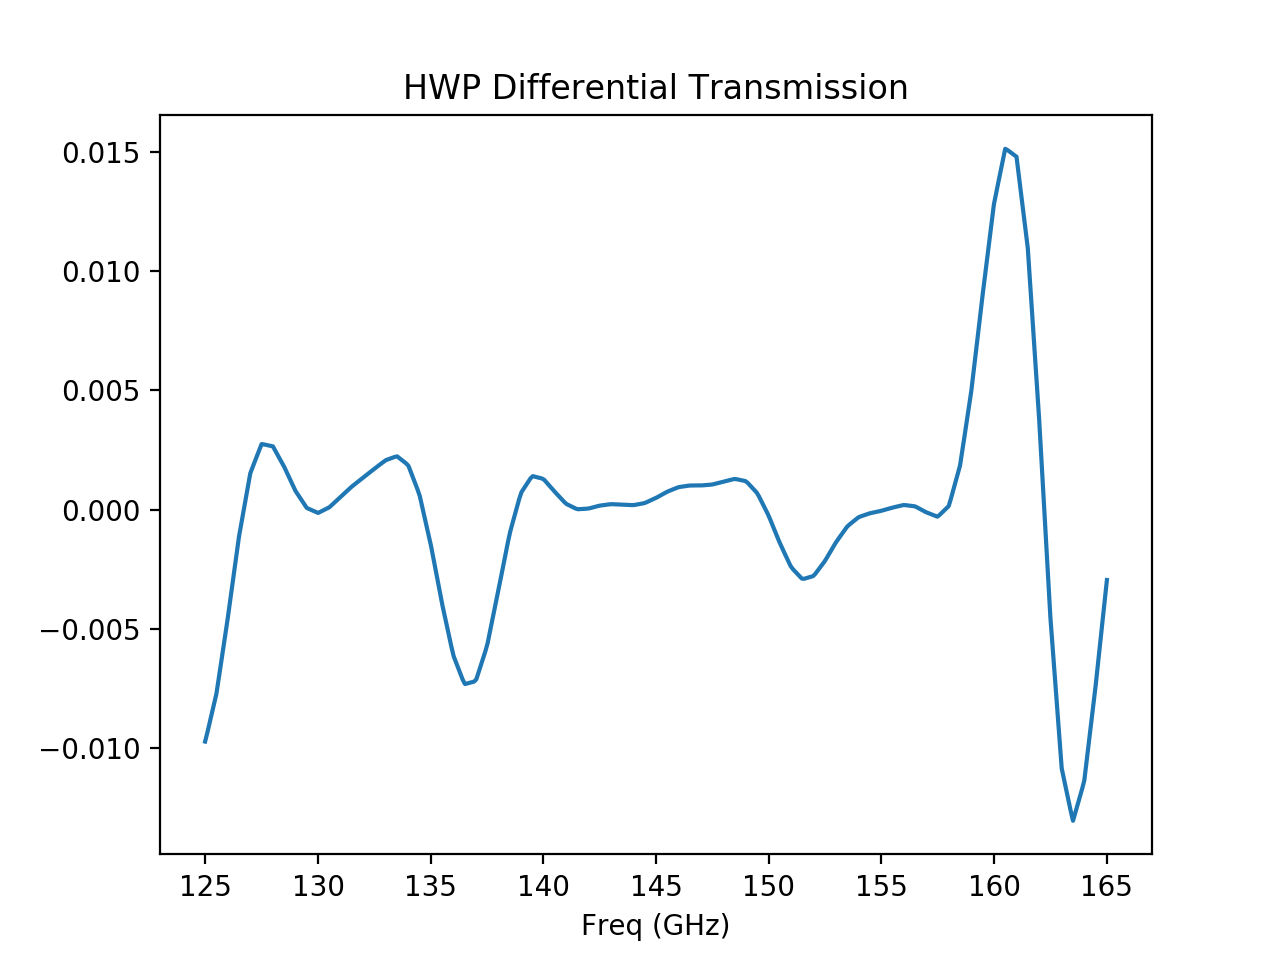

In [23]:
hwp = tel.elements[tel.hwpIndex]
plt.plot(tel.freqs / GHz, map(hwp.Ip, tel.freqs) )
plt.title("HWP Differential Transmission")
plt.xlabel("Freq (GHz)")
plt.show()